In [1]:
#折线图
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
import pyproj
import math
import os

In [89]:
data=pd.read_excel(r'F:\扬州\扬州刷卡数据\30min刷卡统计_6(1).xlsx')
data

,Unnamed: 0,时间段,线路编号,老年卡客运量,其他卡客运量,总客运量
0,0,5：00：00-5：30：00,1,0,0,0
1,1,5：00：00-5：30：00,2,0,0,0
2,2,5：00：00-5：30：00,3,0,0,0
3,3,5：00：00-5：30：00,5,0,0,0
4,4,5：00：00-5：30：00,6,0,0,0
...,...,...,...,...,...,...
6265,160,23：30：00-0,387,0,0,0
6266,161,23：30：00-0,388,0,0,0
6267,162,23：30：00-0,612,0,0,0
6268,163,23：30：00-0,622,0,0,0


In [90]:
data1=data[(data['线路编号']<300)]
data1

,Unnamed: 0,时间段,线路编号,老年卡客运量,其他卡客运量,总客运量
0,0,5：00：00-5：30：00,1,0,0,0
1,1,5：00：00-5：30：00,2,0,0,0
2,2,5：00：00-5：30：00,3,0,0,0
3,3,5：00：00-5：30：00,5,0,0,0
4,4,5：00：00-5：30：00,6,0,0,0
...,...,...,...,...,...,...
6224,119,23：30：00-0,280,0,0,0
6225,120,23：30：00-0,281,0,0,0
6226,121,23：30：00-0,282,0,0,0
6227,122,23：30：00-0,286,0,0,0


In [7]:
IDSY = data1.drop_duplicates(subset=['线路编号'],keep='first')
IDSY

,Unnamed: 0,时间段,线路编号,老年卡客运量,其他卡客运量,总客运量
0,0,5：00：00-5：30：00,1,0,0,0
1,1,5：00：00-5：30：00,2,0,0,0
2,2,5：00：00-5：30：00,3,0,0,0
3,3,5：00：00-5：30：00,5,0,0,0
4,4,5：00：00-5：30：00,6,0,0,0
...,...,...,...,...,...,...
119,119,5：00：00-5：30：00,280,0,0,0
120,120,5：00：00-5：30：00,281,0,0,0
121,121,5：00：00-5：30：00,282,0,0,0
122,122,5：00：00-5：30：00,286,0,0,0


In [82]:
time_index=[]
for i in range(0,19):
    k1=2*i
    time_index.append(k1)
for i in range(0,19):
    k2=2*i+1
    time_index.append(k2)
print(len(time_index))

38


In [ ]:
###循环结构
for i in range(1,len(IDSY)):
    singledata=data1[(data1['线路编号']==IDSY['线路编号'].iloc[i])]
    xianlu=IDSY['线路编号'].iloc[i]
    singledata['time_index']=time_index
    singledata.sort_values(by='time_index',inplace=True)
    last=len(singledata)-1
    singledata['时间段'].iloc[last]='23：30：00-24：00：00'
    singledata=singledata[(singledata['总客运量']!=0)]
    #绘制单系列折线图
    # 导入模块
    import matplotlib as mpl

    # 设置图框的大小
    fig = plt.figure(figsize=(14,6),dpi=150)
    # 绘图
    plt.plot(singledata['时间段'], # x轴数据
             singledata['总客运量'], # y轴数据
             linestyle = '-', # 折线类型
             linewidth = 2, # 折线宽度
             color = 'steelblue', # 折线颜色
             marker = 'o', # 点的形状
             markersize = 2, # 点的大小
             markeredgecolor='black', # 点的边框色
             markerfacecolor='steelblue') # 点的填充色

    # 添加标题和坐标轴标签
    plt.title('总客运量')
    plt.xlabel('时间')
    plt.ylabel('客流量（人/30min）')

    # 剔除图框上边界和右边界的刻度
    plt.tick_params(top = 'off', right = 'off')

    # 获取图的坐标信息
    ax = plt.gca()
    # 设置日期的显示格式  
    #date_format = mpl.times.DateFormatter("%H：%M：%S")  
    #ax.xaxis.set_major_formatter(date_format) 

    # 设置x轴显示多少个日期刻度
    #xlocator = mpl.ticker.LinearLocator(10)
    # 设置x轴每个刻度的间隔天数
    xlocator = mpl.ticker.MultipleLocator(1)
    ax.xaxis.set_major_locator(xlocator)
    ###设置坐标轴
    ax.tick_params(axis='x',#x轴或y轴
                     labelsize=10, # 字体大小设置
                     color='black',    # 标签颜色设置  
                     labelcolor='black', # 字体颜色设置
                     direction='in' # 标签方向设置
                      ) 
    # 为了避免x轴日期刻度标签的重叠，设置x轴刻度自动展现，并且45度倾斜
    fig.autofmt_xdate(rotation = 45)
    ##保存图片
    plt.savefig(os.path.join(r'F:\扬州\扬州刷卡数据\6号图\\'+str(xianlu)+'总客运量图.jpg'))
    # 显示图形
    plt.show()
    
    ###绘制多系列图
    # 设置图框的大小
    fig = plt.figure(figsize=(14,6),dpi=250)

    # 系列1
    plt.plot(singledata['时间段'], # x轴数据
             singledata['老年卡客运量'], # y轴数据
             linestyle = '-', # 折线类型
             linewidth = 2, # 折线宽度
             color = 'r', # 折线颜色
             marker = 'o', # 点的形状
             markersize = 6, # 点的大小
             markeredgecolor='black', # 点的边框色
             markerfacecolor='steelblue', # 点的填充色
             label = '老年卡客运量') # 添加标签

    # 系列2
    plt.plot(singledata['时间段'], # x轴数据
             singledata['总客运量'], # y轴数据
             linestyle = '-', # 折线类型
             linewidth = 2, # 折线宽度
             color = 'steelblue', # 折线颜色
             marker = 'o', # 点的形状
             markersize = 2, # 点的大小
             markeredgecolor='black', # 点的边框色
             markerfacecolor='#ff9999', # 点的填充色
             label = '总客运量') # 添加标签

    # 添加标题和坐标轴标签
    plt.title('老年客运量与总客运量')
    plt.xlabel('时间')
    plt.ylabel('客流量（人/30min）')

    # 剔除图框上边界和右边界的刻度
    plt.tick_params(top = 'off', right = 'off')

    # 获取图的坐标信息
    ax = plt.gca()
    # 设置日期的显示格式  
    #date_format = mpl.dates.DateFormatter('%m-%d')  
    #ax.xaxis.set_major_formatter(date_format) 

    # 设置x轴显示多少个日期刻度
    #xlocator = mpl.ticker.LinearLocator(10)
    # 设置x轴每个刻度的间隔天数
    xlocator = mpl.ticker.MultipleLocator(1)
    ax.xaxis.set_major_locator(xlocator)
      #坐标轴刻度字体颜色设置
    ax.tick_params(axis='x',#x轴或y轴
                     labelsize=10, # 字体大小设置
                     color='black',    # 标签颜色设置  
                     labelcolor='black', # 字体颜色设置
                     direction='in' # 标签方向设置
                      ) 
    # 为了避免x轴日期刻度标签的重叠，设置x轴刻度自动展现，并且45度倾斜
    fig.autofmt_xdate(rotation = 45)

    # 显示图例
    plt.legend(fontsize = 10)
    plt.savefig(os.path.join(r'F:\扬州\扬州刷卡数据\\6号图\\'+str(xianlu)+'对比图.jpg'))

    # 显示图形
    plt.show()

In [80]:
singledata=data1[(data1['线路编号']==IDSY['线路编号'].iloc[0])]
xianlu=IDSY['线路编号'].iloc[0]
singledata

,Unnamed: 0,时间段,线路编号,老年卡客运量,其他卡客运量,总客运量
0,0,5：00：00-5：30：00,1,0,0,0
165,0,6：00：00-6：30：00,1,39,10,49
330,0,7：00：00-7：30：00,1,61,23,84
495,0,8：00：00-8：30：00,1,86,17,103
660,0,9：00：00-9：30：00,1,81,14,95
825,0,10：00：00-10：30：00,1,51,11,62
990,0,11：00：00-11：30：00,1,36,7,43
1155,0,12：00：00-12：30：00,1,16,6,22
1320,0,13：00：00-13：30：00,1,23,11,34
1485,0,14：00：00-14：30：00,1,29,14,43


In [81]:
len(singledata)

38

In [83]:
singledata['time_index']=time_index
singledata.sort_values(by='time_index',inplace=True)

In [84]:
singledata

,Unnamed: 0,时间段,线路编号,老年卡客运量,其他卡客运量,总客运量,time_index
0,0,5：00：00-5：30：00,1,0,0,0,0
3135,0,5：30：00-6：00：00,1,0,0,0,1
165,0,6：00：00-6：30：00,1,39,10,49,2
3300,0,6：30：00-7：00：00,1,58,11,69,3
330,0,7：00：00-7：30：00,1,61,23,84,4
3465,0,7：30：00-8：00：00,1,80,21,101,5
495,0,8：00：00-8：30：00,1,86,17,103,6
3630,0,8：30：00-9：00：00,1,93,22,115,7
660,0,9：00：00-9：30：00,1,81,14,95,8
3795,0,9：30：00-10：00：00,1,61,14,75,9


In [85]:
singledata['时间段'].iloc[37]='23：30：00-24：00：00'
singledata

,Unnamed: 0,时间段,线路编号,老年卡客运量,其他卡客运量,总客运量,time_index
0,0,5：00：00-5：30：00,1,0,0,0,0
3135,0,5：30：00-6：00：00,1,0,0,0,1
165,0,6：00：00-6：30：00,1,39,10,49,2
3300,0,6：30：00-7：00：00,1,58,11,69,3
330,0,7：00：00-7：30：00,1,61,23,84,4
3465,0,7：30：00-8：00：00,1,80,21,101,5
495,0,8：00：00-8：30：00,1,86,17,103,6
3630,0,8：30：00-9：00：00,1,93,22,115,7
660,0,9：00：00-9：30：00,1,81,14,95,8
3795,0,9：30：00-10：00：00,1,61,14,75,9


In [91]:
singledata=singledata[(singledata['总客运量']!=0)]

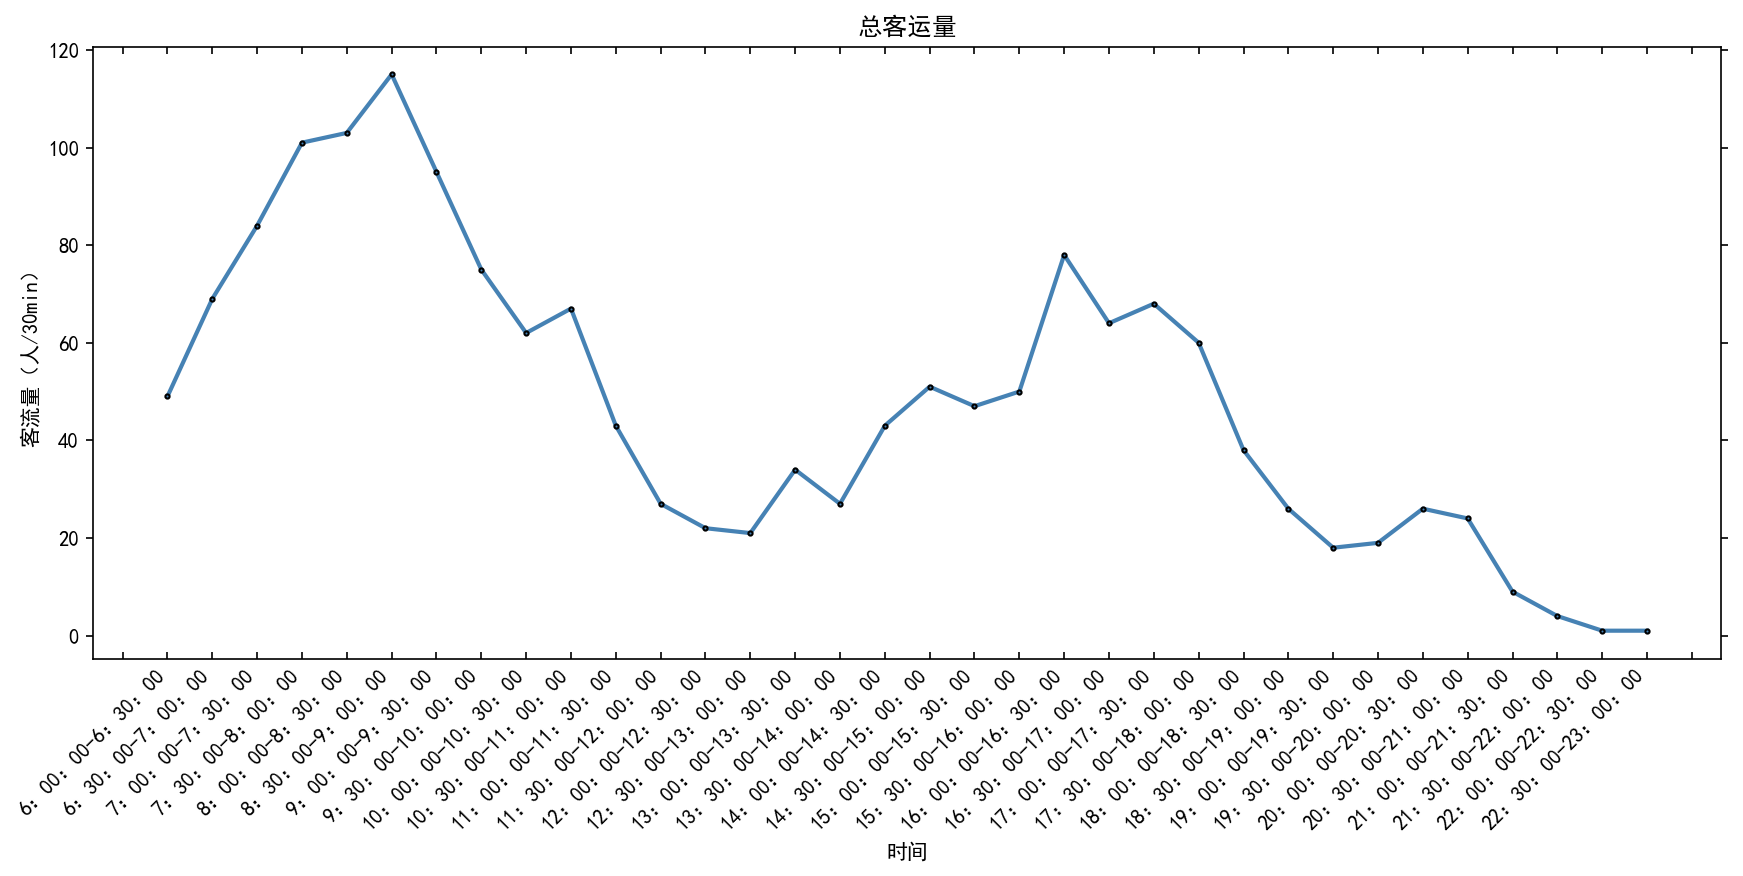

In [94]:
#绘制单系列折线图
# 导入模块
import matplotlib as mpl

# 设置图框的大小
fig = plt.figure(figsize=(14,6),dpi=150)
# 绘图
plt.plot(singledata['时间段'], # x轴数据
         singledata['总客运量'], # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'steelblue', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 2, # 点的大小
         markeredgecolor='black', # 点的边框色
         markerfacecolor='steelblue') # 点的填充色

# 添加标题和坐标轴标签
plt.title('总客运量')
plt.xlabel('时间')
plt.ylabel('客流量（人/30min）')

# 剔除图框上边界和右边界的刻度
plt.tick_params(top = 'off', right = 'off')

# 获取图的坐标信息
ax = plt.gca()
# 设置日期的显示格式  
#date_format = mpl.times.DateFormatter("%H：%M：%S")  
#ax.xaxis.set_major_formatter(date_format) 

# 设置x轴显示多少个日期刻度
#xlocator = mpl.ticker.LinearLocator(10)
# 设置x轴每个刻度的间隔天数
xlocator = mpl.ticker.MultipleLocator(1)
ax.xaxis.set_major_locator(xlocator)
###设置坐标轴
ax.tick_params(axis='x',#x轴或y轴
                 labelsize=10, # 字体大小设置
                 color='black',    # 标签颜色设置  
                 labelcolor='black', # 字体颜色设置
                 direction='in' # 标签方向设置
                  ) 
# 为了避免x轴日期刻度标签的重叠，设置x轴刻度自动展现，并且45度倾斜
fig.autofmt_xdate(rotation = 45)
##保存图片
plt.savefig(os.path.join(r'F:\扬州\扬州刷卡数据\6号\\'+str(xianlu)+'总客运量图.jpg'))
# 显示图形
plt.show()


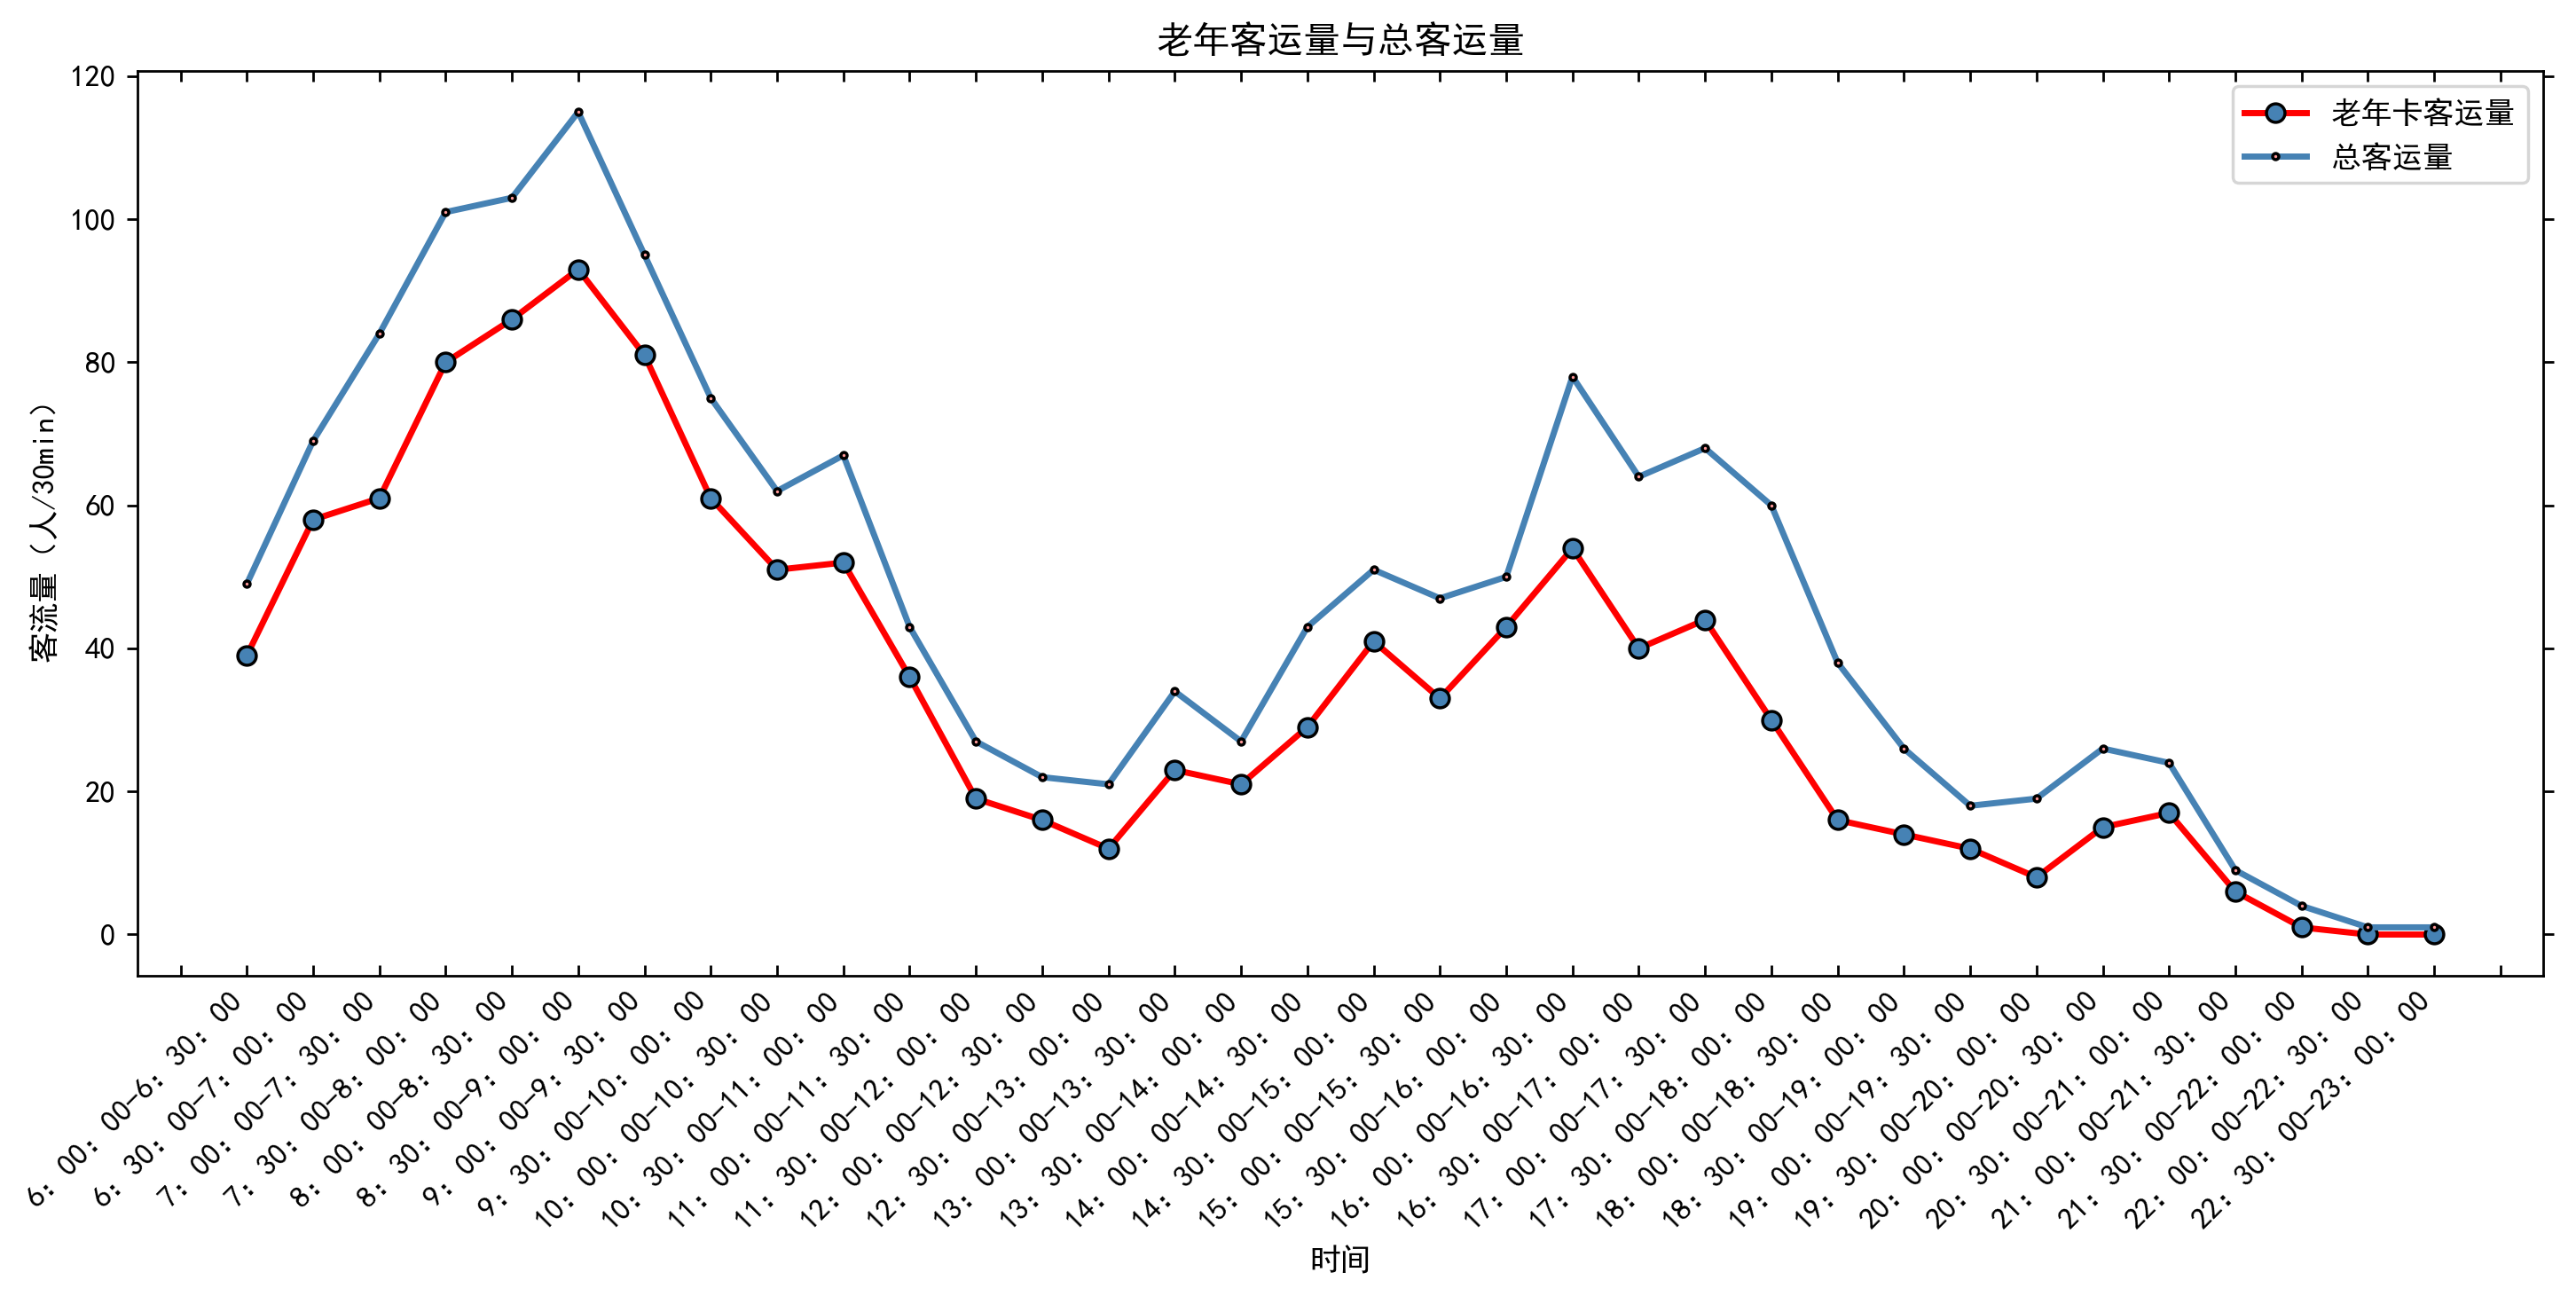

In [95]:
# 设置图框的大小
fig = plt.figure(figsize=(14,6),dpi=250)

# 绘图--阅读人数趋势
plt.plot(singledata['时间段'], # x轴数据
         singledata['老年卡客运量'], # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'r', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
         markeredgecolor='black', # 点的边框色
         markerfacecolor='steelblue', # 点的填充色
         label = '老年卡客运量') # 添加标签

# 绘图--阅读人次趋势
plt.plot(singledata['时间段'], # x轴数据
         singledata['总客运量'], # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'steelblue', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 2, # 点的大小
         markeredgecolor='black', # 点的边框色
         markerfacecolor='#ff9999', # 点的填充色
         label = '总客运量') # 添加标签

# 添加标题和坐标轴标签
plt.title('老年客运量与总客运量')
plt.xlabel('时间')
plt.ylabel('客流量（人/30min）')

# 剔除图框上边界和右边界的刻度
plt.tick_params(top = 'off', right = 'off')

# 获取图的坐标信息
ax = plt.gca()
# 设置日期的显示格式  
#date_format = mpl.dates.DateFormatter('%m-%d')  
#ax.xaxis.set_major_formatter(date_format) 

# 设置x轴显示多少个日期刻度
#xlocator = mpl.ticker.LinearLocator(10)
# 设置x轴每个刻度的间隔天数
xlocator = mpl.ticker.MultipleLocator(1)
ax.xaxis.set_major_locator(xlocator)
  #坐标轴刻度字体颜色设置
ax.tick_params(axis='x',#x轴或y轴
                 labelsize=10, # 字体大小设置
                 color='black',    # 标签颜色设置  
                 labelcolor='black', # 字体颜色设置
                 direction='in' # 标签方向设置
                  ) 
# 为了避免x轴日期刻度标签的重叠，设置x轴刻度自动展现，并且45度倾斜
fig.autofmt_xdate(rotation = 45)

# 显示图例
plt.legend(fontsize = 10)
plt.savefig(os.path.join(r'F:\扬州\扬州刷卡数据\\6号\\'+str(xianlu)+'对比图.jpg'))

# 显示图形
plt.show()
